In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = len(merge_df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df["Mouse ID"].value_counts()
new_index = merge_df.set_index("Mouse ID")

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
g989.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,13.0,13.0,13.000000,13.000000,13.000000
mean,21.0,26.0,14.615385,52.341020,0.538462
std,0.0,0.0,11.079549,5.243412,0.660225
min,21.0,26.0,0.000000,45.000000,0.000000
25%,21.0,26.0,5.000000,48.786801,0.000000
50%,21.0,26.0,15.000000,51.745156,0.000000
75%,21.0,26.0,20.000000,55.326122,1.000000
max,21.0,26.0,35.000000,62.570880,2.000000


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Clear out g989 data
clean_df = new_index.drop(index = "g989")
clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df["Drug Regimen"].count()
print(mouse_count)

1880


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
avg = clean_df.groupby(["Drug Regimen"]).mean()
avg = avg.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Avg"})
drug_avg = avg["Tumor Volume Avg"]


med = clean_df.groupby(["Drug Regimen"]).median()
med = med.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Med"})
drug_med = med["Tumor Volume Med"]


var = clean_df.groupby(["Drug Regimen"]).var()
var = var.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Var"})
drug_var = var["Tumor Volume Var"]


stdev = clean_df.groupby(["Drug Regimen"]).std()
stdev = stdev.rename(columns={"Tumor Volume (mm3)":"Tumor Volume StDev"})
drug_stdev = stdev["Tumor Volume StDev"]


SEM = clean_df.groupby(["Drug Regimen"]).sem()
SEM = SEM.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM"})
drug_sem = SEM["Tumor Volume SEM"]

# Comibine all Drug Regimen data points into a single DataFrame
drug_summary = pd.DataFrame({"Tumor Volume Mean": drug_avg,
                             "Tumor Volume Median": drug_med,
                             "Tumor Volume Variance": drug_var,
                             "Tumor Volume Standard Deviation": drug_stdev,
                             "Tumor Volume Standard Error of Means": drug_sem})

drug_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_agg_df = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
drug_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0, 0.5, '# of Mice')

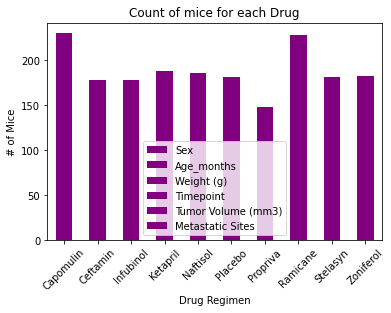

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
clean_count_grouped = clean_df.groupby("Drug Regimen").count()
bar_chart = clean_count_grouped.plot(kind="bar", title="Count of mice for each Drug", color="purple", rot=45)
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("# of Mice")

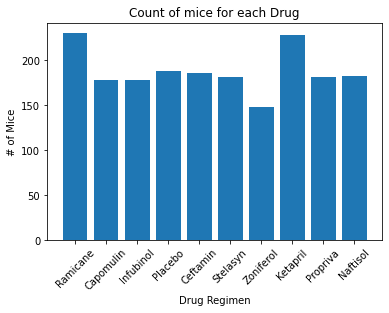

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#clean_count_grouped

plt.bar(clean_df["Drug Regimen"].unique(), clean_count_grouped["Sex"], align="center")
plt.title("Count of mice for each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.xticks(rotation=45)
plt.show()

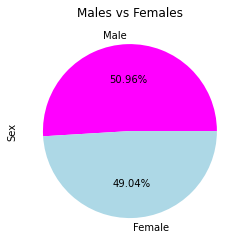

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()
colors = ["magenta", "lightblue"]
pie_chart = gender_count.plot(kind="pie", title="Males vs Females", autopct="%1.2f%%", colors = colors)
pie_chart

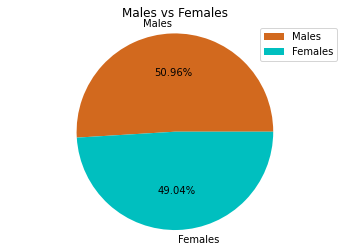

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Males", "Females"]
colors = ["chocolate", "c"]
plt.pie(gender_count, labels=labels, autopct="%1.2f%%", colors=colors)
plt.title("Males vs Females")
plt.axis("equal")
plt.legend(loc="best")

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_df = merge_df[merge_df["Drug Regimen"].isin(drug_list)]

final_timepoint = drugs_df.groupby("Mouse ID").max()["Timepoint"]
final_timepoint = pd.DataFrame(final_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merge_df = pd.merge(final_timepoint, clean_df, on=("Mouse ID", "Timepoint"), how="left")
new_merge_df

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a275,45,Ceftamin,Female,20,28,62.999356,3
a411,45,Ramicane,Male,3,22,38.407618,1
a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...
y769,45,Ceftamin,Female,6,27,68.594745,4
y793,45,Capomulin,Male,17,17,31.896238,2
y865,45,Ceftamin,Male,23,26,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatments in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_df = new_merge_df.loc[new_merge_df["Drug Regimen"] == treatments, "Tumor Volume (mm3)"]
    tumor_vol.append(tumor_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_df.quantile([0.25, 0.5, 0.75])
    lower_quart = quartiles[0.25]
    upper_quart = quartiles[0.75]
    IQR = upper_quart - lower_quart
    print(f"{treatments} outliers are below {round(lower_quart - 1.5 * IQR, 3)} and above {round(upper_quart + 1.5 * IQR, 3)}.")

Capomulin outliers are below 20.705 and above 51.832.
Ramicane outliers are below 17.913 and above 54.307.
Infubinol outliers are below 36.833 and above 82.741.
Ceftamin outliers are below 25.355 and above 87.666.


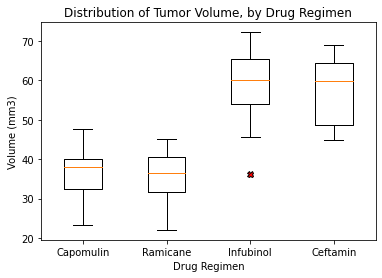

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor="red", marker="X")
plt.boxplot(tumor_vol, labels=drug_list, flierprops=green_diamond)
plt.title("Distribution of Tumor Volume, by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Volume (mm3)")
plt.show()

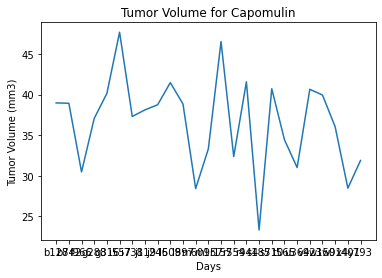

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = new_merge_df.loc[new_merge_df["Drug Regimen"] == "Capomulin", :]
tumor_values = cap_df["Tumor Volume (mm3)"]
plt.plot(tumor_values)
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for Capomulin")
plt.show()

Text(0.5, 0, 'Mouse Weight (g)')

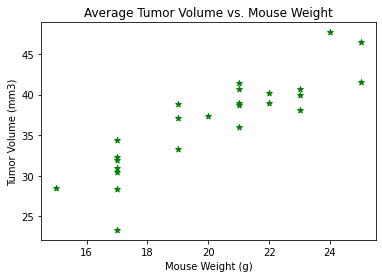

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
y_values = cap_df["Tumor Volume (mm3)"]
x_values = cap_df["Weight (g)"]
plt.scatter(x_values, y_values, color="green", marker="*")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The correlation coefficient is {round(rvalue,3)}, which shows a strong positive relationship between mouse weight and tumor volume.")

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The least squares regression line is given by {line_eq}.")

The correlation coefficient is 0.877, which shows a strong positive relationship between mouse weight and tumor volume.
The least squares regression line is given by y = 1.75x +1.45.


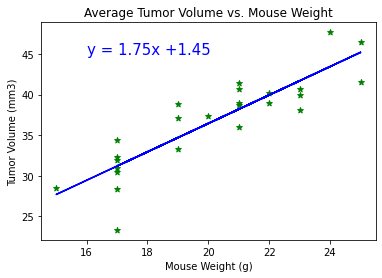

In [19]:
plt.scatter(x_values, y_values, color="green", marker="*")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq,(16,45),fontsize=15,color="blue")
plt.show()